In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# True News EDA

In [2]:
#True News Dataset
df_True=pd.read_csv("True.csv",encoding='latin1', error_bad_lines=False)
df_True

Skipping line 11067: expected 4 fields, saw 8



title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21411  'Fully committed' NATO backs new U.S. approach...   
21412  LexisNexis withdrew two products from Chinese ...   
21413  Minsk cultural hub becomes haven from authorities   
21414  Vatican upbeat on possibility of Pope Francis ...   
21415  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
21411  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
21412  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
21413  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
21414  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
21415  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date  
0      December 31, 2017   
1      December 29, 2017   
2      December 31, 2017   
3      December 30, 2017   
4      December 29, 2017   
...                   ...  
21411    August 22, 2017   
21412    August 22, 2017   
21413    August 22, 2017   
21414    August 22, 2017   
21415    August 22, 2017   

[21416 rows x 4 columns]

# EDA

In [3]:
len(df_True)

21416

In [4]:
df_True.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21416 non-null  object
 1   text     21416 non-null  object
 2   subject  21416 non-null  object
 3   date     21416 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [5]:
df_True.describe()

title  \
count                                               21416   
unique                                              20825   
top     Factbox: Trump fills top jobs for his administ...   
freq                                                   14   

                                                     text       subject  \
count                                               21416         21416   
unique                                              21191             2   
top     (Reuters) - Highlights for U.S. President Dona...  politicsNews   
freq                                                    8         11271   

                      date  
count                21416  
unique                 716  
top     December 20, 2017   
freq                   182

In [6]:
# Check null
df_True.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [7]:
#Title Word startistics: min.mean, max and interquartile range

title_length = df_True.title.str.split().str.len()
title_length.describe()

count    21416.000000
mean         9.954473
std          1.700786
min          4.000000
25%          9.000000
50%         10.000000
75%         11.000000
max         20.000000
Name: title, dtype: float64

In [8]:
#Text Word startistics: min.mean, max and interquartile range

txt_length = df_True.text.str.split().str.len()
txt_length.describe()

count    21416.000000
mean       385.693173
std        274.050960
min          0.000000
25%        148.000000
50%        360.000000
75%        525.000000
max       5172.000000
Name: text, dtype: float64

In [9]:
#The statistics for the training and testing sets are as follows:

#The text attribute has a higher word count with an average of 385 words and 75% having more than 525 words.
#The title attribute is a short statement with an average of 10 words, and 75% of them are around 11 words.

Distribution of subjects:
politicsNews    11271
worldnews       10145
Name: subject, dtype: int64


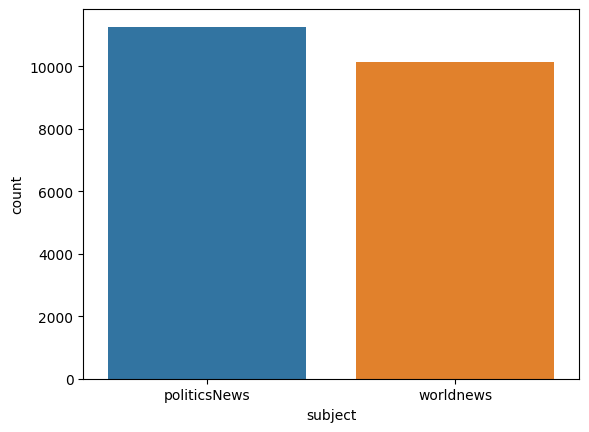

In [10]:
sns.countplot(x="subject", data=df_True);
print("Distribution of subjects:")
print(df_True.subject.value_counts());

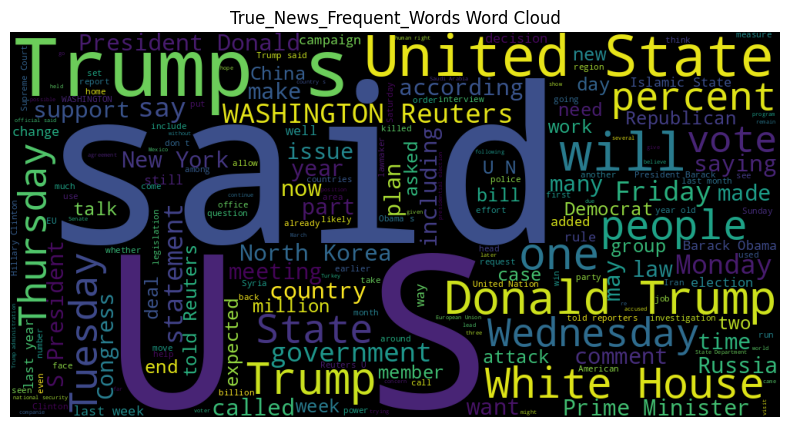

In [11]:
# Word cloud for the  True dataset
def generate_word_cloud(data, title):
    text = " ".join(data['text'])
    wordcloud = WordCloud(width=1000, height=500, background_color='Black').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title + " Word Cloud")
    plt.show()
generate_word_cloud(df_True, "True_News_Frequent_Words")

# Fake News EDA

In [12]:
df_Fake=pd.read_csv("Fake.csv",encoding='latin1', error_bad_lines=False)
df_Fake

title  \
0       Donald Trump Sends Out Embarrassing New Year...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obamas Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied Safe Zone Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...         News   
3      On Christmas day, Donald Trump announced that ...         News   
4      Pope Francis used his annual Christmas Day mes...         News   
...                                                  ...          ...   
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                    date  
0      December 31, 2017  
1      December 31, 2017  
2      December 30, 2017  
3      December 29, 2017  
4      December 25, 2017  
...                  ...  
23476   January 16, 2016  
23477   January 16, 2016  
23478   January 15, 2016  
23479   January 14, 2016  
23480   January 12, 2016  

[23481 rows x 4 columns]

# EDA

In [13]:
len(df_Fake)

23481

In [14]:
df_Fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [15]:
df_Fake.describe()

title   text subject  \
count                                               23481  23481   23481   
unique                                              17903  17455       6   
top     MEDIA IGNORES Time That Bill Clinton FIRED His...           News   
freq                                                    6    626    9050   

                date  
count          23481  
unique          1681  
top     May 10, 2017  
freq              46

In [16]:
df_Fake.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [17]:
#Title Word startistics: min.mean, max and interquartile range

title_length_F = df_Fake.title.str.split().str.len()
title_length_F.describe()

count    23481.000000
mean        14.766662
std          4.376629
min          1.000000
25%         12.000000
50%         14.000000
75%         17.000000
max         42.000000
Name: title, dtype: float64

In [18]:
#Text Word startistics: min.mean, max and interquartile range

text_length_F = df_Fake.text.str.split().str.len()
text_length_F.describe()

count    23481.000000
mean       423.197905
std        408.388890
min          0.000000
25%        240.000000
50%        363.000000
75%        506.000000
max       8135.000000
Name: text, dtype: float64

In [19]:
#The statistics for the training and testing sets are as follows:

#The text attribute has a word count with an average of 423 words and 75% having more than 506 words.
#The title attribute is a short statement with an average of 14 words, and 75% of them are around 17 words.

In [20]:
df_Fake['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

Distribution of subjects:
politicsNews    11271
worldnews       10145
Name: subject, dtype: int64


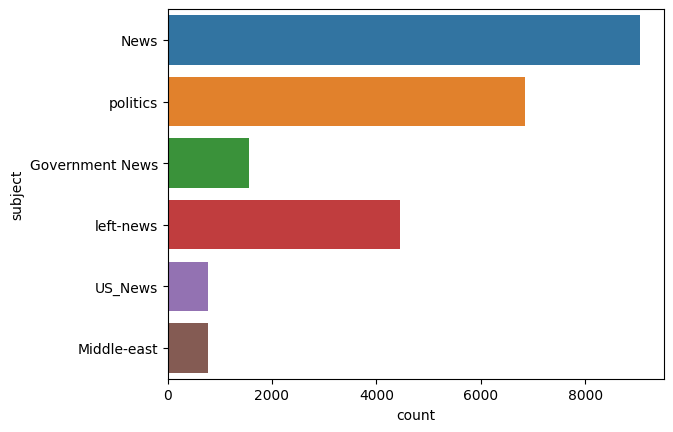

In [21]:
sns.countplot(y="subject", data=df_Fake);
print("Distribution of subjects:")
print(df_True.subject.value_counts());

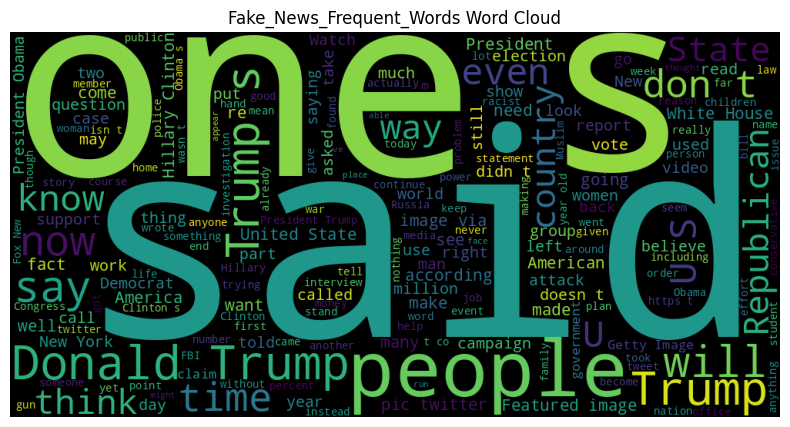

In [22]:
# Word cloud for the Fake dataset
def generate_word_cloud(data, title):
    text = " ".join(data['text'])
    wordcloud = WordCloud(width=1000, height=500, background_color='Black').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title + " Word Cloud")
    plt.show()
generate_word_cloud(df_Fake, "Fake_News_Frequent_Words")

In [23]:
# Add a new column 'True News' to identify
df_True['True_News'] = 1
df_Fake['True_News'] = 0

In [24]:
new_df= pd.concat([df_True, df_Fake], ignore_index=True)
new_df

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
44892  McPain: John McCain Furious That Iran Treated ...   
44893  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44894  Sunnistan: US and Allied Safe Zone Plan to T...   
44895  How to Blow $700 Million: Al Jazeera America F...   
44896  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
44892  21st Century Wire says As 21WIRE reported earl...   Middle-east   
44893  21st Century Wire says It s a familiar theme. ...   Middle-east   
44894  Patrick Henningsen  21st Century WireRemember ...   Middle-east   
44895  21st Century Wire says Al Jazeera America will...   Middle-east   
44896  21st Century Wire says As 21WIRE predicted in ...   Middle-east   

                     date  True_News  
0      December 31, 2017           1  
1      December 29, 2017           1  
2      December 31, 2017           1  
3      December 30, 2017           1  
4      December 29, 2017           1  
...                   ...        ...  
44892    January 16, 2016          0  
44893    January 16, 2016          0  
44894    January 15, 2016          0  
44895    January 14, 2016          0  
44896    January 12, 2016          0  

[44897 rows x 5 columns]

In [25]:
sub_world=len(new_df[new_df['subject'] == "worldnews"])
sub_pol=len(new_df[new_df['subject'] == "politicsNews"])

In [26]:
new_df["subject"].unique()

array(['politicsNews', 'worldnews', 'News', 'politics', 'Government News',
       'left-news', 'US_News', 'Middle-east'], dtype=object)

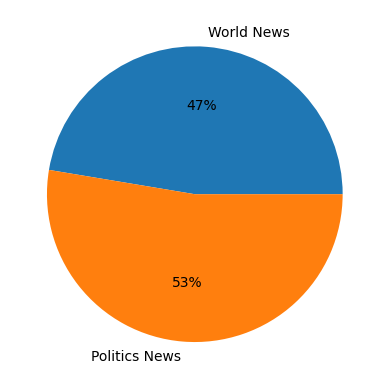

In [27]:
# pie chart for subjects in True Data set
plt.pie([sub_world,sub_pol] , labels=["World News","Politics News"], autopct='%0.0f%%')
plt.show()

In [28]:
sub_news=len(new_df[new_df['subject'] == "News"])
sub_polt=len(new_df[new_df['subject'] == "politics"])
sub_govt=len(new_df[new_df['subject'] == "Government News"])
sub_left=len(new_df[new_df['subject'] == "left-news"])
sub_US=len(new_df[new_df['subject'] == "US_News"])
sub_east=len(new_df[new_df['subject'] == "Middle-east"])

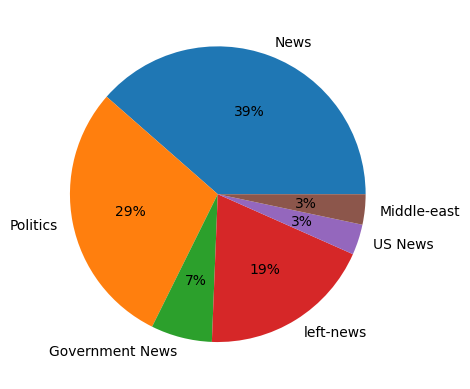

In [29]:
# pie chart for subjects in Fake Data set
plt.pie([sub_news, sub_polt, sub_govt, sub_left, sub_US, sub_east ] , labels=["News","Politics","Government News","left-news","US News","Middle-east"], autopct='%0.0f%%')
plt.show()

In [30]:
def fix_word(word):
    if word == "yous":
        return "u.s."
    return word

def remove_contractions(text):
    fixed_word = []
    for word in text.split():
        fixed_word.append(fix_word(word))
    counter = 0
    for i in fixed_word:
        if i != fixed_word[0]:
            counter += 1
        if i == "you.S.":
            fixed_word[counter] = "u.s."
        if i == "yous":
            fixed_word[counter] = "u.s."
    fixed_whole = ' '.join(fixed_word)
    return fixed_whole

new_df['title_wo_contra'] = new_df['title'].apply(lambda x: remove_contractions(x))
new_df['text_wo_contra'] = new_df['text'].apply(lambda x: remove_contractions(x))
new_df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  True_News  \
0  December 31, 2017           1   
1  December 29, 2017           1   
2  December 31, 2017           1   
3  December 30, 2017           1   
4  December 29, 2017           1   

                                     title_wo_contra  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                      text_wo_contra  
0  WASHINGTON (Reuters) - The head of a conservat...  
1  WASHINGTON (Reuters) - Transgender people will...  
2  WASHINGTON (Reuters) - The special counsel inv...  
3  WASHINGTON (Reuters) - Trump campaign adviser ...  
4  SEATTLE/WASHINGTON (Reuters) - President Donal...

In [31]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

# Applies the functions with lambda to do the stated function
new_df['title_wo_punct']=new_df['title_wo_contra'].apply(lambda x: remove_punctuation(x))
new_df['text_wo_punct']=new_df['text_wo_contra'].apply(lambda x: remove_punctuation(x))
new_df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  True_News  \
0  December 31, 2017           1   
1  December 29, 2017           1   
2  December 31, 2017           1   
3  December 30, 2017           1   
4  December 29, 2017           1   

                                     title_wo_contra  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                      text_wo_contra  \
0  WASHINGTON (Reuters) - The head of a conservat...   
1  WASHINGTON (Reuters) - Transgender people will...   
2  WASHINGTON (Reuters) - The special counsel inv...   
3  WASHINGTON (Reuters) - Trump campaign adviser ...   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...   

                                      title_wo_punct  \
0  As US budget fight looms Republicans flip thei...   
1  US military to accept transgender recruits on ...   
2  Senior US Republican senator Let Mr Mueller do...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge much more...   

                                       text_wo_punct  
0  WASHINGTON Reuters  The head of a conservative...  
1  WASHINGTON Reuters  Transgender people will be...  
2  WASHINGTON Reuters  The special counsel invest...  
3  WASHINGTON Reuters  Trump campaign adviser Geo...  
4  SEATTLEWASHINGTON Reuters  President Donald Tr...

In [32]:
def remove_stopwords(text):
    text = text.split()
    text=[word for word in text if word not in stopword]
    text= ' '.join(text)
    return text

# Applies the functions with lambda to do the stated function
new_df['title_wo_stopwords'] = new_df['title_wo_punct'].apply(lambda x: remove_stopwords(x.lower()))
new_df['text_wo_stopwords'] = new_df['text_wo_punct'].apply(lambda x: remove_stopwords(x.lower()))

new_df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  True_News  \
0  December 31, 2017           1   
1  December 29, 2017           1   
2  December 31, 2017           1   
3  December 30, 2017           1   
4  December 29, 2017           1   

                                     title_wo_contra  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                      text_wo_contra  \
0  WASHINGTON (Reuters) - The head of a conservat...   
1  WASHINGTON (Reuters) - Transgender people will...   
2  WASHINGTON (Reuters) - The special counsel inv...   
3  WASHINGTON (Reuters) - Trump campaign adviser ...   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...   

                                      title_wo_punct  \
0  As US budget fight looms Republicans flip thei...   
1  US military to accept transgender recruits on ...   
2  Senior US Republican senator Let Mr Mueller do...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge much more...   

                                       text_wo_punct  \
0  WASHINGTON Reuters  The head of a conservative...   
1  WASHINGTON Reuters  Transgender people will be...   
2  WASHINGTON Reuters  The special counsel invest...   
3  WASHINGTON Reuters  Trump campaign adviser Geo...   
4  SEATTLEWASHINGTON Reuters  President Donald Tr...   

                                  title_wo_stopwords  \
0  us budget fight looms republicans flip fiscal ...   
1  us military accept transgender recruits monday...   
2    senior us republican senator let mr mueller job   
3  fbi russia probe helped australian diplomat ti...   
4  trump wants postal service charge much amazon ...   

                                   text_wo_stopwords  
0  washington reuters head conservative republica...  
1  washington reuters transgender people allowed ...  
2  washington reuters special counsel investigati...  
3  washington reuters trump campaign adviser geor...  
4  seattlewashington reuters president donald tru...

In [33]:
# Removes any formatted quotation marks that the remove contractions function
# didn't remove

def remove_quotemarks(text):
  text = text.replace('“', "")
  text = text.replace('’', "")
  text = text.replace('”', "")
  return text

new_df['filtered_title'] =new_df['title_wo_stopwords'].apply(lambda x:remove_quotemarks(x))
new_df['filtered'] =new_df['text_wo_stopwords'].apply(lambda x:remove_quotemarks(x))
new_df['filtered']

0        washington reuters head conservative republica...
1        washington reuters transgender people allowed ...
2        washington reuters special counsel investigati...
3        washington reuters trump campaign adviser geor...
4        seattlewashington reuters president donald tru...
                               ...                        
44892    21st century wire says 21wire reported earlier...
44893    21st century wire says familiar theme whenever...
44894    patrick henningsen 21st century wireremember o...
44895    21st century wire says al jazeera america go h...
44896    21st century wire says 21wire predicted new ye...
Name: filtered, Length: 44897, dtype: object

In [34]:

# Deletes all the excess columns and sets the title equal to the preprocessed version

new_df["joined_title"] = new_df["filtered_title"]
new_df = new_df.drop(["title_wo_contra","title_wo_punct","title_wo_stopwords", "filtered_title"], axis=1)
new_df["joined_text"] = new_df["filtered"]
new_df = new_df.drop(["text_wo_contra","text_wo_punct","text_wo_stopwords", "filtered"], axis=1)
new_df.head(10)

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   
5  White House, Congress prepare for talks on spe...   
6  Trump says Russia probe will be fair, but time...   
7  Factbox: Trump on Twitter (Dec 29) - Approval ...   
8         Trump on Twitter (Dec 28) - Global Warming   
9  Alabama official to certify Senator-elect Jone...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
5  WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...  politicsNews   
6  WEST PALM BEACH, Fla (Reuters) - President Don...  politicsNews   
7  The following statements were posted to the ve...  politicsNews   
8  The following statements were posted to the ve...  politicsNews   
9  WASHINGTON (Reuters) - Alabama Secretary of St...  politicsNews   

                 date  True_News  \
0  December 31, 2017           1   
1  December 29, 2017           1   
2  December 31, 2017           1   
3  December 30, 2017           1   
4  December 29, 2017           1   
5  December 29, 2017           1   
6  December 29, 2017           1   
7  December 29, 2017           1   
8  December 29, 2017           1   
9  December 28, 2017           1   

                                        joined_title  \
0  us budget fight looms republicans flip fiscal ...   
1  us military accept transgender recruits monday...   
2    senior us republican senator let mr mueller job   
3  fbi russia probe helped australian diplomat ti...   
4  trump wants postal service charge much amazon ...   
5  white house congress prepare talks spending im...   
6  trump says russia probe fair timeline unclear nyt   
7  factbox trump twitter dec 29 approval rating a...   
8                trump twitter dec 28 global warming   
9  alabama official certify senatorelect jones to...   

                                         joined_text  
0  washington reuters head conservative republica...  
1  washington reuters transgender people allowed ...  
2  washington reuters special counsel investigati...  
3  washington reuters trump campaign adviser geor...  
4  seattlewashington reuters president donald tru...  
5  west palm beach flawashington reuters white ho...  
6  west palm beach fla reuters president donald t...  
7  following statements posted verified twitter a...  
8  following statements posted verified twitter a...  
9  washington reuters alabama secretary state joh...

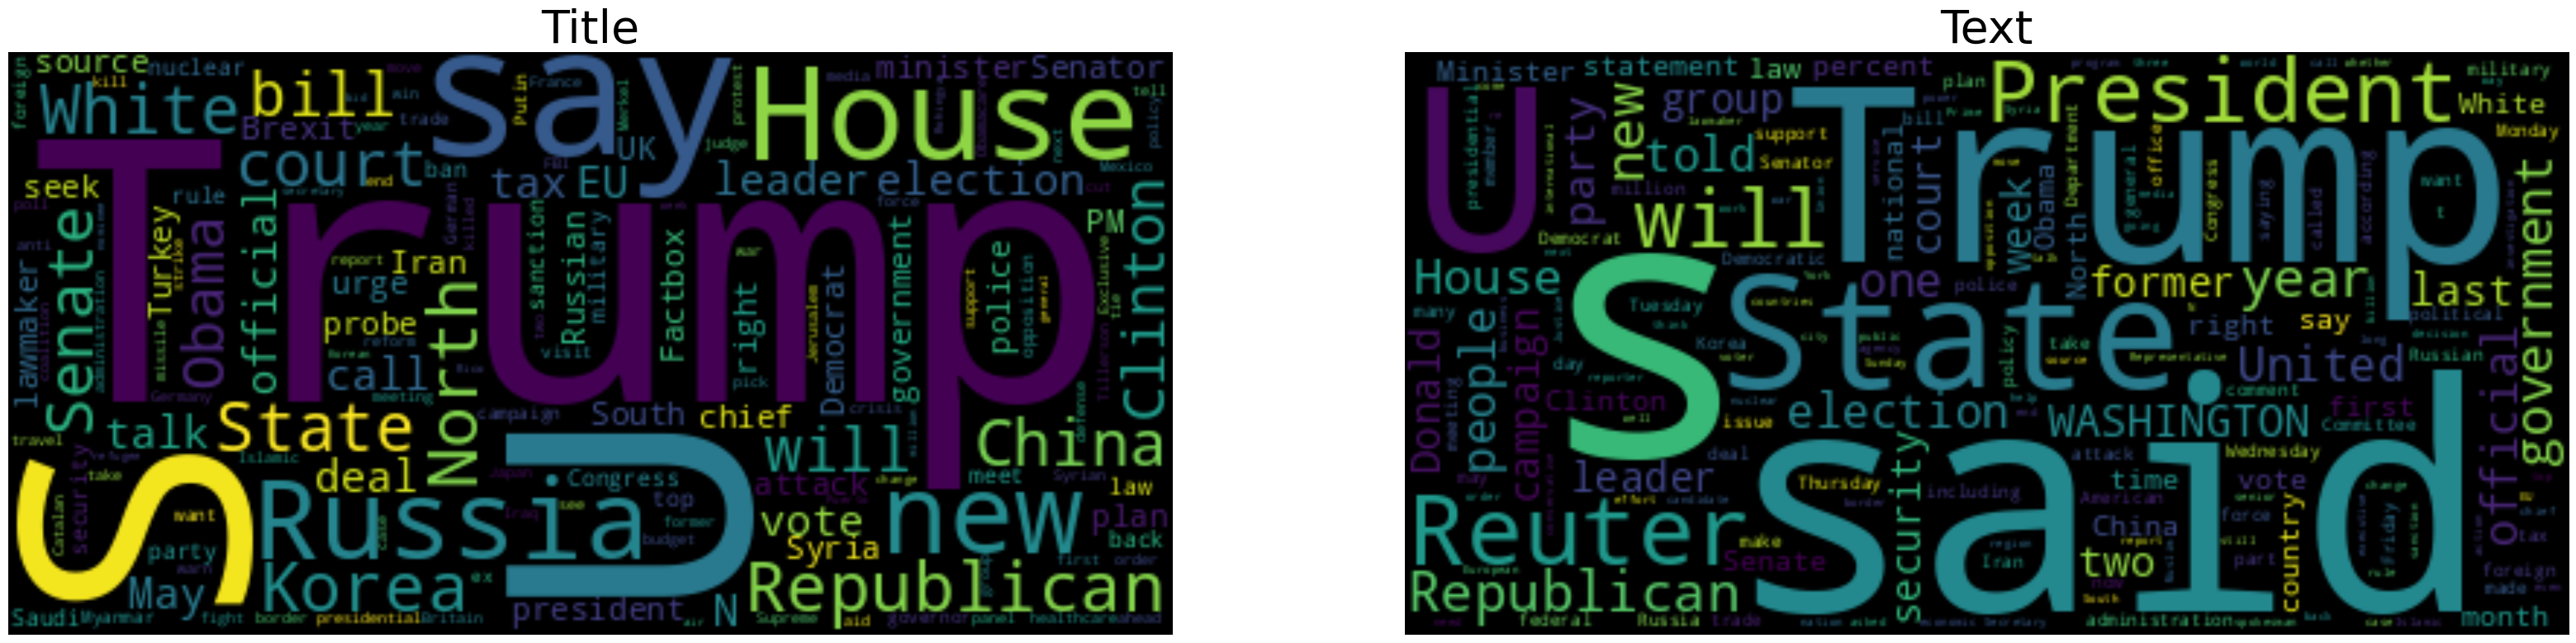

In [35]:
#Visualization
# Wordcloud of title, text in True news
import wordcloud
# Cleaned dataframe of True labels
df_True = new_df[new_df.True_News == 1]

title_true = " ".join(tit for tit in df_True['title'])
text_true = " ".join(txt for txt in df_True['text'])

plt.figure(figsize=(40, 30))

# Title
title_cloud = wordcloud.WordCloud(collocations=False, background_color='black').generate(title_true)
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Title", fontsize=40)
plt.imshow(title_cloud, interpolation='bilinear')

# Text
text_cloud = wordcloud.WordCloud(collocations=False, background_color='black').generate(text_true)
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Text", fontsize=40)
plt.imshow(text_cloud, interpolation='bilinear')


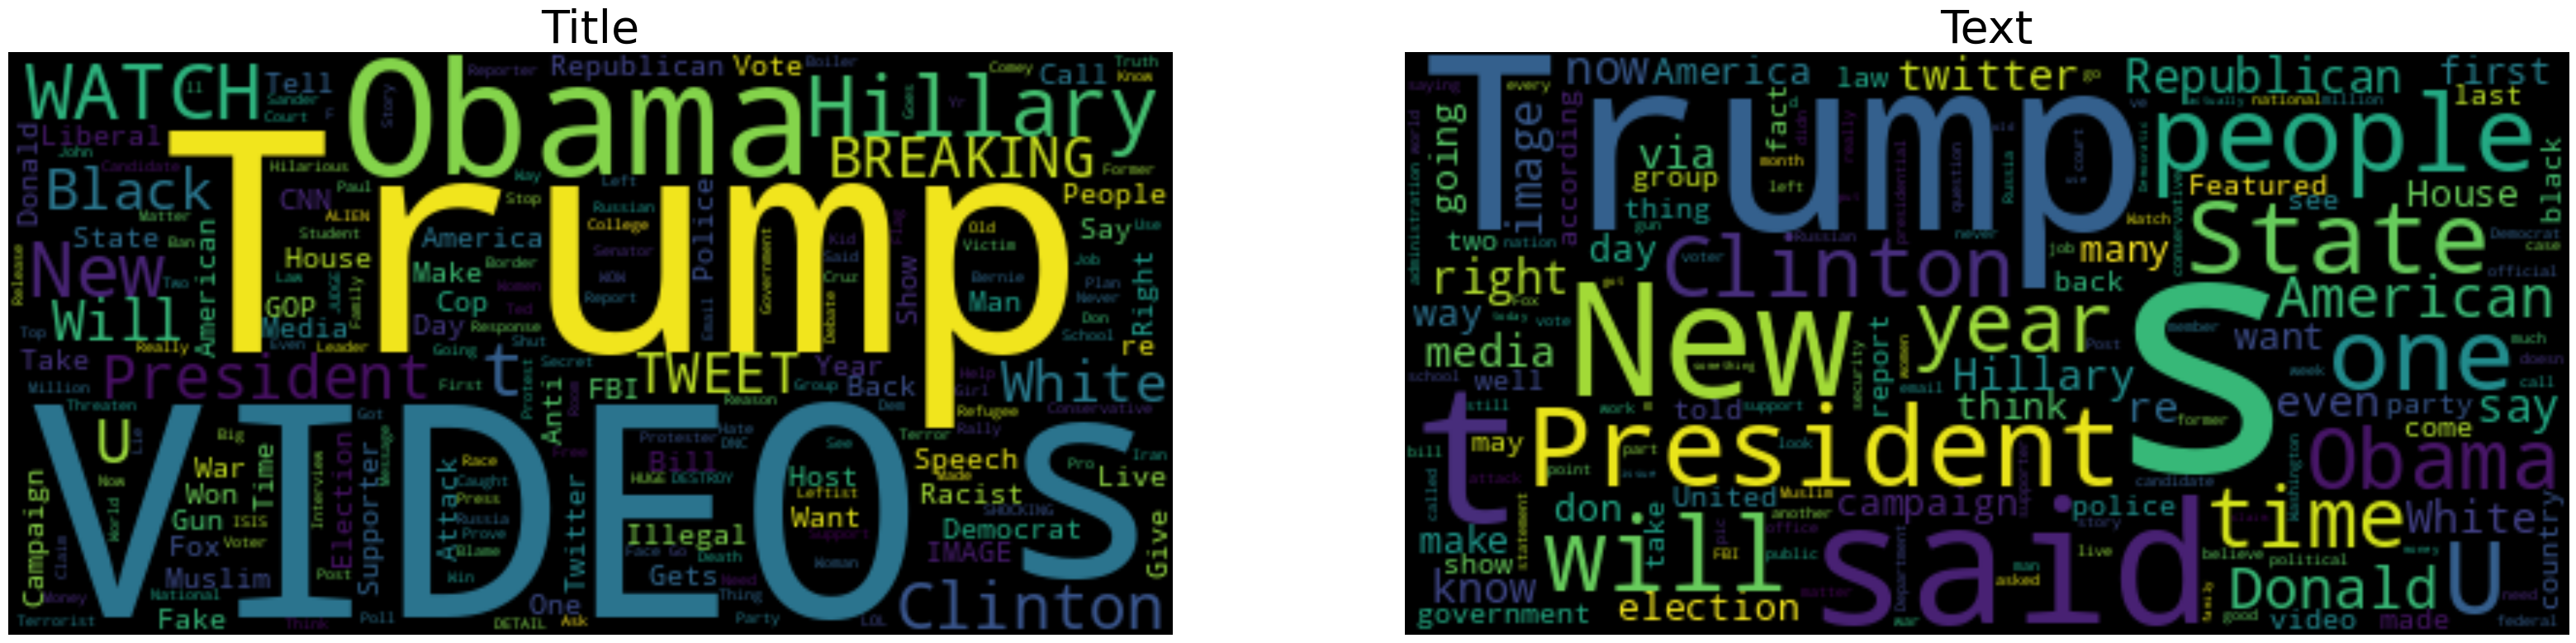

In [36]:
# Wordcloud of title, text in Fake news

# Cleaned dataframe of Fake labels

df_Fake = new_df[new_df.True_News == 0]

title_fake = " ".join(tit for tit in df_Fake['title'])
text_fake = " ".join(txt for txt in df_Fake['text'])

plt.figure(figsize=(40, 30))

# Title
title_cloud = wordcloud.WordCloud(collocations=False, background_color='black').generate(title_fake)
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Title", fontsize=40)
plt.imshow(title_cloud, interpolation='bilinear')

# Text
text_cloud = wordcloud.WordCloud(collocations=False, background_color='black').generate(text_fake)
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Text", fontsize=40)
plt.imshow(text_cloud, interpolation='bilinear')

In [37]:
#Now we will define the dependent variable and independent variables
x = new_df["text"]
y = new_df["True_News"]

# Splitting the Dataset into a Training and Testing Set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [38]:
#Convert Text to Vectors
'''machine learning algorithms can only work with numerical inputs, and by converting text into vectors,
we can represent textual data in a manner that is simple to analyze and process using these algorithms'''

from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer()
xv_train = vector.fit_transform(x_train)
xv_test = vector.transform(x_test)

In [39]:
# Creating a Model by
#1 Logistic Regression

from sklearn.linear_model import LogisticRegression

LR= LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [40]:
pred_lr=LR.predict(xv_test)
LR.score(xv_test, y_test)

0.9851521900519673

In [41]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7111
           1       0.98      0.99      0.98      6359

    accuracy                           0.99     13470
   macro avg       0.98      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [42]:
from sklearn.metrics import confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, pred_lr))

Confusion Matrix:
 [[6984  127]
 [  73 6286]]


In [43]:
# 2 Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [44]:
pred_DT = DT.predict(xv_test)
DT.score(xv_test, y_test)

0.9958426132145508

In [45]:
print(classification_report(y_test, pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7111
           1       1.00      1.00      1.00      6359

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



In [46]:
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_DT))

Confusion Matrix:
 [[7081   30]
 [  26 6333]]


In [48]:
# 3 Gradient Booster
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=42)
GBC.fit(xv_train, y_train)


GradientBoostingClassifier(random_state=42)

In [49]:
pred_gbc= GBC.predict(xv_test)
GBC.score(xv_test, y_test)

0.995025983667409

In [50]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7111
           1       0.99      1.00      0.99      6359

    accuracy                           1.00     13470
   macro avg       0.99      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



In [51]:
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_gbc))

Confusion Matrix:
 [[7061   50]
 [  17 6342]]


In [52]:
# 4 Random Forest
from sklearn.ensemble import RandomForestClassifier

RFC= RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [53]:
pred_rfc= RFC.predict(xv_test)
RFC.score(xv_test, y_test)

0.9881959910913141

In [54]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7111
           1       0.99      0.99      0.99      6359

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [55]:
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_rfc))

Confusion Matrix:
 [[7028   83]
 [  76 6283]]


In [56]:
# 5 Naive Bayes
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(xv_train,y_train)
ypred = nb.predict(xv_test)
ypred

array([0, 1, 1, ..., 1, 0, 1])

In [57]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7111
           1       0.94      0.93      0.94      6359

    accuracy                           0.94     13470
   macro avg       0.94      0.94      0.94     13470
weighted avg       0.94      0.94      0.94     13470



In [58]:
print("Confusion Matrix:\n", confusion_matrix(y_test, ypred))

Confusion Matrix:
 [[6737  374]
 [ 446 5913]]


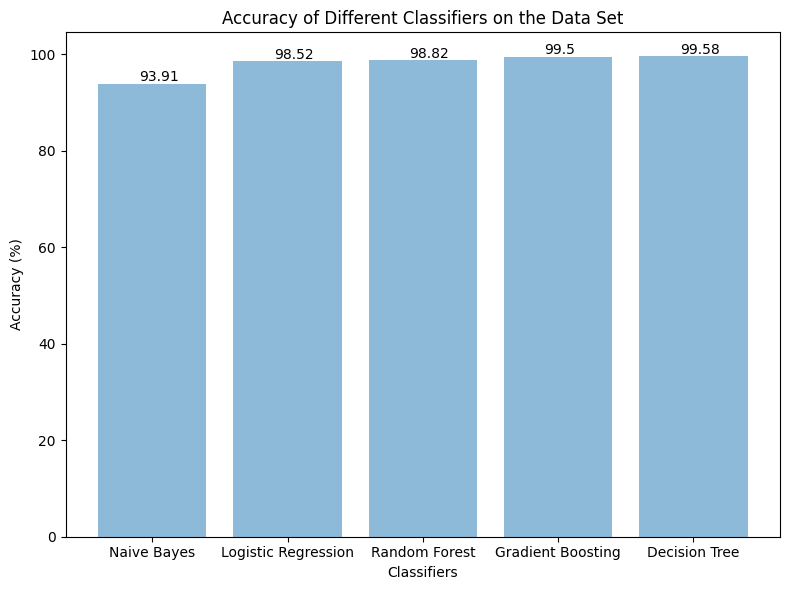

In [59]:
# Calculate the accuracy for each classifier
accuracy_nb = round(accuracy_score(y_test, ypred)*100,2)
accuracy_lr = round(accuracy_score(y_test, pred_lr)*100,2)
accuracy_rf = round(accuracy_score(y_test, pred_rfc)*100,2)
accuracy_gbc = round(accuracy_score(y_test, pred_gbc)*100,2)
accuracy_dt = round(accuracy_score(y_test, pred_DT)*100,2)



# Create a bar plot for the accuracy of each classifier
classifiers = ['Naive Bayes', 'Logistic Regression', 'Random Forest','Gradient Boosting','Decision Tree']
accuracy = [accuracy_nb, accuracy_lr, accuracy_rf, accuracy_gbc,accuracy_dt]

y_pos = np.arange(len(classifiers))

plt.figure(figsize=(8,6))
plt.bar(y_pos, accuracy, align='center', alpha=0.5)
plt.xticks(y_pos, classifiers)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Classifiers on the Data Set')
plt.tight_layout()

# Add labels for the bars
for i in range(len(accuracy)):
    plt.text(x=i-0.1, y=accuracy[i]+0.5, s=str(accuracy[i]))

plt.show()

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import pickle

# Define the pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # Add any text vectorization steps here
    ('classifier', DecisionTreeClassifier())
])

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Predict using the pipeline
pred_probabilities = pipeline.predict_proba(x_test)
pred_real_probabilities = pred_probabilities[:, 1]  # Probability of real news

# Convert prediction probabilities to percentages
pred_real_probabilities_percent = pred_real_probabilities * 100

# Calculate accuracy
accuracy = pipeline.score(x_test, y_test)
print("Accuracy:", accuracy)

# Save the pipeline (including the model and vectorization steps) as a .pkl file
with open('decision_tree_pipeline.pkl', 'wb') as model_file:
    pickle.dump(pipeline, model_file)

print("Pipeline saved as decision_tree_pipeline.pkl")

Accuracy: 0.9956941351150705
Pipeline saved as decision_tree_pipeline.pkl
